<a href="https://colab.research.google.com/github/chiawld/UCL-Summer-School-Intro-to-AI-Course/blob/main/preprocessing_EDA/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

This notebook will teach you the basics of data cleaning using simple pandas functions.

**What we'll learn:**
1. Load data from a CSV file
2. Look at our data using built-in functions
3. Find missing values
4. Handle missing values
5. Save our clean data

**Instructions:**
- Upload your CSV file to Google Colab
- Change the file name in the code below
- Run each cell one by one

In [2]:
# Import pandas - our main tool for working with data
# Import numpy - a library for numerical operations
# Import matplotlib - for creating simple plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Your Data

First, let's load our CSV file and take a look at it.

In [3]:
# Load your data - change the filename to match your data file
df = pd.read_csv('/Users/chicswldrg/Desktop/UZH 2024:25/Summer School Juli 2025/UCL-Summer-School-Intro-to-AI-Course-1/datasets/datascience_salaries.csv')
#'/datascience_salaries.csv')

print("Data loaded successfully!")
print(f"Our dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Data loaded successfully!
Our dataset has 133349 rows and 11 columns


In [4]:
# Look at the first 5 rows
print("First 5 rows:")
df.head()

First 5 rows:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,13600000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


## 2. Explore Your Data

Let's use built-in pandas functions to understand our data better.

In [5]:
# Get basic information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           133349 non-null  int64 
 1   experience_level    133348 non-null  object
 2   employment_type     133347 non-null  object
 3   job_title           133349 non-null  object
 4   salary              133349 non-null  int64 
 5   salary_currency     133349 non-null  object
 6   salary_in_usd       133349 non-null  int64 
 7   employee_residence  133348 non-null  object
 8   remote_ratio        133349 non-null  int64 
 9   company_location    133349 non-null  object
 10  company_size        133348 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.2+ MB


In [6]:
# Get statistics for numerical columns
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133349.000000,1.333490e+05,1.333490e+05,133349.000000
mean,2024.358705,1.632833e+05,1.577182e+05,20.905669
std,0.680788,2.173860e+05,8.290857e+04,40.590044
min,2020.000000,1.400000e+04,1.500000e+04,0.000000
25%,2024.000000,1.060200e+05,1.060000e+05,0.000000
50%,2024.000000,1.470000e+05,1.462060e+05,0.000000
75%,2025.000000,1.990000e+05,1.980000e+05,0.000000
max,2025.000000,3.040000e+07,1.360000e+07,100.000000


In [7]:
# Look at all column names
print("Column names in our dataset:")
print(df.columns.tolist())

Column names in our dataset:
['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


In [8]:
# Check what type of data each column contains
print("Data types for each column:")
df.dtypes

Data types for each column:


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

## 3. Check for Duplicates

In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 68723


In [10]:
# Remove duplicate rows if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows.")
else:
    print("No duplicate rows found.")

Removed 68723 duplicate rows.


## 4. Check for Missing Values

Missing values are empty cells in our data. Let's find them!

In [11]:
# Check how many missing values each column has
df.isnull().sum()

work_year             0
experience_level      1
employment_type       2
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    1
remote_ratio          0
company_location      0
company_size          1
dtype: int64

In [15]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
# Let's see which columns have missing values
columns_with_missing = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
['experience_level', 'employment_type', 'employee_residence', 'company_size']


In [13]:
# Look at the range of values for one specific column (change the column name as needed)
column_name = 'employment_type'  # Change this to any column you want to examine
print(f"Unique values in '{column_name}':")
print(df[column_name].value_counts())

Unique values in 'employment_type':
employment_type
FT    63955
CT      338
PT      315
FL       16
Name: count, dtype: int64


Checking the categories/possible values of each column can also help identify potential spelling mistakes and typos.
e.g. England vs. Englnd

## 5. Handle Missing Values

Now let's fix the missing values. We have several options:
- Remove rows with missing values
- Fill missing values with a specific value
- Fill missing values with the average/most common value

In [16]:
# Option 1: Remove rows with ANY missing values
df_no_missing = df.dropna()
print(f"Original data: {df.shape[0]} rows")
print(f"After removing missing: {df_no_missing.shape[0]} rows")

Original data: 64626 rows
After removing missing: 64621 rows


In [17]:
# Option 2: Fill missing values with a specific value (example: 'Unknown')
df_filled = df.fillna('Unknown')
print(f"\nAfter filling missing values with 'Unknown':")
print(df_filled.isnull().sum().sum(), "missing values remain")


After filling missing values with 'Unknown':
0 missing values remain


In [18]:
# Option 3: Fill missing values - numbers with mean, text with mode (most common value)
df_filled_smart = df.copy()

# Fill numeric columns with mean
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_filled_smart[numeric_columns] = df_filled_smart[numeric_columns].fillna(df[numeric_columns].mean())

# Fill categorical columns with mode (most common value)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
	mode_value = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
	df_filled_smart[col] = df_filled_smart[col].fillna(mode_value)

print(f"\nAfter filling missing values smartly:")
print(df_filled_smart.isnull().sum())


After filling missing values smartly:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [19]:
# Choose which cleaned version you want to use
# e.g., Option 1: Data with missing values removed
df = df_no_missing

# For now, let's just check our final data
# Final check of our data
print("Final check - shape of our data:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Missing values: {df.isnull().sum().sum()}")


Final check - shape of our data:
Rows: 64621, Columns: 11
Missing values: 0


## 6. Check for Outliers and Data Errors

Let's look for unusual values that might be errors in our data.

In [20]:
# Look for extreme values in numerical columns
print("Checking for potential outliers in numerical data:")
print("=" * 50)

# Get numerical columns only
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Show min and max values for each numerical column
for col in numerical_cols:
    print(f"{col}:")
    print(f"  Minimum: {df[col].min()}")
    print(f"  Maximum: {df[col].max()}")
    print(f"  Average: {df[col].mean():.2f}")
    print()

Checking for potential outliers in numerical data:
work_year:
  Minimum: 2020
  Maximum: 2025
  Average: 2024.36

salary:
  Minimum: 14000
  Maximum: 30400000
  Average: 162305.54

salary_in_usd:
  Minimum: 15000
  Maximum: 13600000
  Average: 151438.30

remote_ratio:
  Minimum: 0
  Maximum: 100
  Average: 24.64



In [21]:
# Check for unusual values in text columns
print("Checking text columns for potential errors:")
print("=" * 50)

# Look at text columns
text_cols = df.select_dtypes(include=['object']).columns

for col in text_cols:
    print(f"\n{col} - unique values:")
    print(df[col].value_counts().head(10))  # Show top 10 most common values

Checking text columns for potential errors:

experience_level - unique values:
experience_level
SE    33998
MI    20908
EN     7400
EX     2315
Name: count, dtype: int64

employment_type - unique values:
employment_type
FT    63952
CT      338
PT      315
FL       16
Name: count, dtype: int64

job_title - unique values:
job_title
Data Scientist               6688
Data Engineer                6555
Data Analyst                 5945
Software Engineer            4478
Engineer                     3932
Machine Learning Engineer    3268
Manager                      3254
Analyst                      2417
Research Scientist           1271
Analytics Engineer           1216
Name: count, dtype: int64

salary_currency - unique values:
salary_currency
USD    59297
GBP     2460
EUR     1982
CAD      473
INR      127
PLN       84
CHF       35
AUD       29
PHP       27
BRL       20
Name: count, dtype: int64

employee_residence - unique values:
employee_residence
US    54190
CA     3967
GB     2547
AU  

Creating box plots to spot outliers...
Look for dots outside the boxes - these might be outliers!


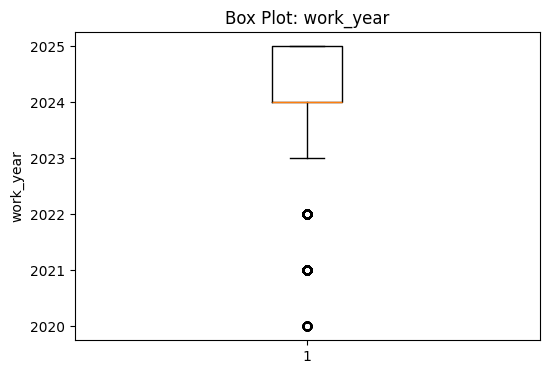

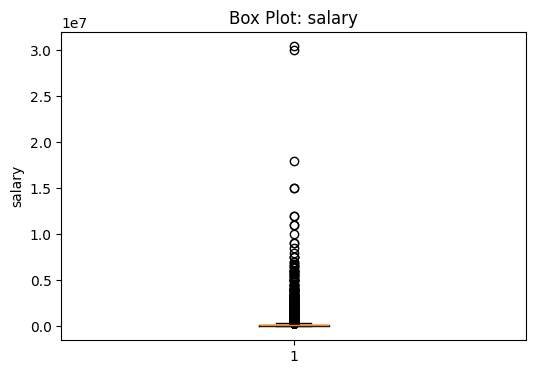

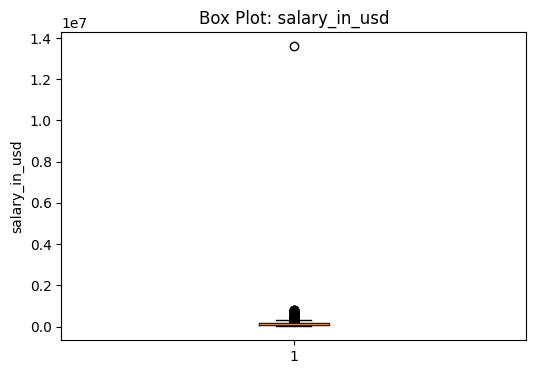

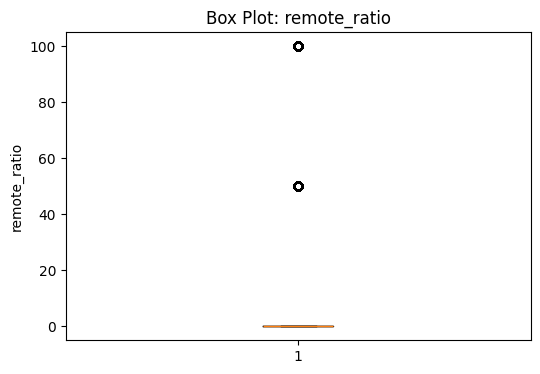

In [22]:
# Simple plots to visualise outliers in numerical data
import matplotlib.pyplot as plt

# Create box plots for numerical columns to spot outliers
numerical_cols = df.select_dtypes(include=[np.number]).columns

print("Creating box plots to spot outliers...")
print("Look for dots outside the boxes - these might be outliers!")

# Create a plot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Box Plot: {col}')
    plt.ylabel(col)
    plt.show()

In [23]:
# In the data science salary data, there is a very high salary value in USD that seems unrealistic.
# Let's check the maximum salary value, and salary in usd value
max_salary_usd = df['salary_in_usd'].max()
print(f"The maximum salary in USD value is: {max_salary_usd}")

The maximum salary in USD value is: 13600000


In [24]:
# Let's remove this unrealistic value
# Assuming the unrealistic value is above a certain threshold, e.g., 1 million USD
threshold = 1_000_000  # Set your threshold here
df = df[df['salary_in_usd'] <= threshold]
print(f"Removed salaries above {threshold} USD. Remaining rows: {df.shape[0]}")

Removed salaries above 1000000 USD. Remaining rows: 64620


## 7. Save Your Clean Data

Once you're happy with your data cleaning, save it to a new file.

In [25]:
df.to_csv('cleaned_data.csv', index=False)  # Uncomment to save